In [1]:
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import eagerpy as ep
from foolbox import TensorFlowModel, accuracy, samples, Model
from foolbox.attacks import LinfPGD

In [3]:
model = tf.keras.applications.ResNet50(weights="imagenet")
pre = dict(flip_axis=-1, mean=[104.0, 116.0, 123.0])  # RGB to BGR
fmodel: Model = TensorFlowModel(model, bounds=(0, 255), preprocessing=pre)
fmodel = fmodel.transform_bounds((0, 1))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [4]:
images, labels = ep.astensors(*samples(fmodel, dataset="imagenet", batchsize=16))
clean_acc = accuracy(fmodel, images, labels)
print(f"clean accuracy:  {clean_acc * 100:.1f} %")

clean accuracy:  87.5 %


In [6]:
images.numpy()

array([[[[0.7490196 , 0.6784314 , 0.53333336],
         [0.75686276, 0.6901961 , 0.5137255 ],
         [0.8156863 , 0.7411765 , 0.5803922 ],
         ...,
         [0.21960784, 0.03529412, 0.07058824],
         [0.22745098, 0.03529412, 0.07058824],
         [0.23137255, 0.0627451 , 0.07450981]],

        [[0.76862746, 0.69803923, 0.5411765 ],
         [0.7411765 , 0.67058825, 0.48235294],
         [0.7647059 , 0.6901961 , 0.5058824 ],
         ...,
         [0.24313726, 0.01960784, 0.07843138],
         [0.22745098, 0.03529412, 0.07450981],
         [0.27450982, 0.1764706 , 0.16078432]],

        [[0.8039216 , 0.72156864, 0.5803922 ],
         [0.7647059 , 0.6901961 , 0.5176471 ],
         [0.7529412 , 0.6745098 , 0.49019608],
         ...,
         [0.23529412, 0.01568628, 0.06666667],
         [0.25490198, 0.13333334, 0.11764706],
         [0.3764706 , 0.39607844, 0.29411766]],

        ...,

        [[0.29803923, 0.34117648, 0.20784314],
         [0.2509804 , 0.32941177, 0.21176471]

In [7]:
images[0].numpy()

array([[[0.7490196 , 0.6784314 , 0.53333336],
        [0.75686276, 0.6901961 , 0.5137255 ],
        [0.8156863 , 0.7411765 , 0.5803922 ],
        ...,
        [0.21960784, 0.03529412, 0.07058824],
        [0.22745098, 0.03529412, 0.07058824],
        [0.23137255, 0.0627451 , 0.07450981]],

       [[0.76862746, 0.69803923, 0.5411765 ],
        [0.7411765 , 0.67058825, 0.48235294],
        [0.7647059 , 0.6901961 , 0.5058824 ],
        ...,
        [0.24313726, 0.01960784, 0.07843138],
        [0.22745098, 0.03529412, 0.07450981],
        [0.27450982, 0.1764706 , 0.16078432]],

       [[0.8039216 , 0.72156864, 0.5803922 ],
        [0.7647059 , 0.6901961 , 0.5176471 ],
        [0.7529412 , 0.6745098 , 0.49019608],
        ...,
        [0.23529412, 0.01568628, 0.06666667],
        [0.25490198, 0.13333334, 0.11764706],
        [0.3764706 , 0.39607844, 0.29411766]],

       ...,

       [[0.29803923, 0.34117648, 0.20784314],
        [0.2509804 , 0.32941177, 0.21176471],
        [0.22352941, 0

In [8]:
# apply the attack
attack = LinfPGD()
epsilons = [
    0.0,
    0.0002,
    0.0005,
    0.0008,
    0.001,
    0.0015,
    0.002,
    0.003,
    0.01,
    0.1,
    0.3,
    0.5,
    1.0,
]
raw_advs, clipped_advs, success = attack(fmodel, images, labels, epsilons=epsilons)

In [14]:
success[6]

TensorFlowTensor(<tf.Tensor: shape=(16,), dtype=bool, numpy=
                 array([ True,  True,  True,  True,  True,  True,  True,  True, False,
                        False,  True,  True,  True,  True,  True,  True])>)

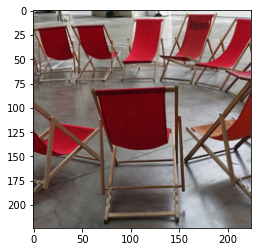

In [24]:
plt.figure()
plt.imshow(clipped_advs[8][1].numpy())